# Performance on IBC Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
liby,libx = combiner('lib',2100)
cony,conx = combiner('con',1800)
neuy,neux = combiner('neutral',700)
x = libx+conx+neux
y = liby+cony+neuy
    
true_x = [func(i.split(', '),'mean') for i in x]

In [4]:
true_x = [func(i.split(', '),'mean') for i in x]
with open('means.csv','w') as f:
    f.write('leaning,label\n')
    for i,j in zip(true_x,y):
        f.write(str(i)+','+str(j)+'\n')

true_x = [func(i.split(', '),'max') for i in x]
with open('maxes.csv','w') as f:
    f.write('leaning,label\n')
    for i,j in zip(true_x,y):
        f.write(str(i)+','+str(j)+'\n')
        
true_x = [func(i.split(', '),'min') for i in x]
with open('mins.csv','w') as f:
    f.write('leaning,label\n')
    for i,j in zip(true_x,y):
        f.write(str(i)+','+str(j)+'\n')

In [5]:
df0 = pd.read_csv('means.csv')
df1 = pd.read_csv('maxes.csv')
df2 = pd.read_csv('mins.csv')

# Performance Across Aggregate Functions

When **Mean** was used as an aggregate function, we can see that while it was able to generally distinguish conservative and liberal language from each other, it generally was unable to distinguish the conservative and neutral sentences.

Additionally, there is a large amount of overlap

label
con        AxesSubplot(0.125,0.125;0.775x0.755)
lib        AxesSubplot(0.125,0.125;0.775x0.755)
neutral    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

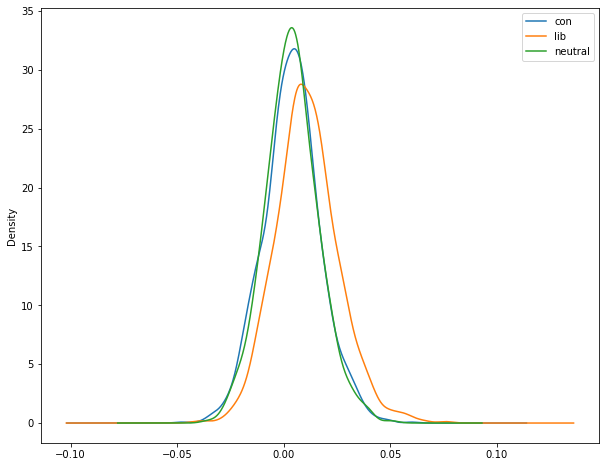

In [6]:
df0.groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True)

When **Max** was used as an aggregate function, it appeared to be slightly more able to distinguish the three, but there is still a significant amount of overlap.

label
con        AxesSubplot(0.125,0.125;0.775x0.755)
lib        AxesSubplot(0.125,0.125;0.775x0.755)
neutral    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

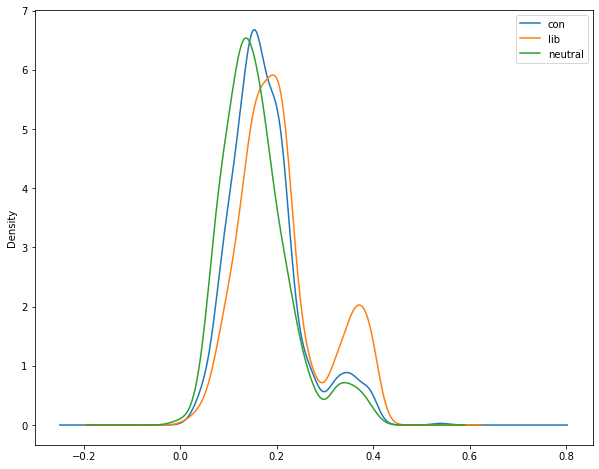

In [7]:
df1.groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True)

This effect seemed similar with **min**, but with less distinguishability

label
con        AxesSubplot(0.125,0.125;0.775x0.755)
lib        AxesSubplot(0.125,0.125;0.775x0.755)
neutral    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

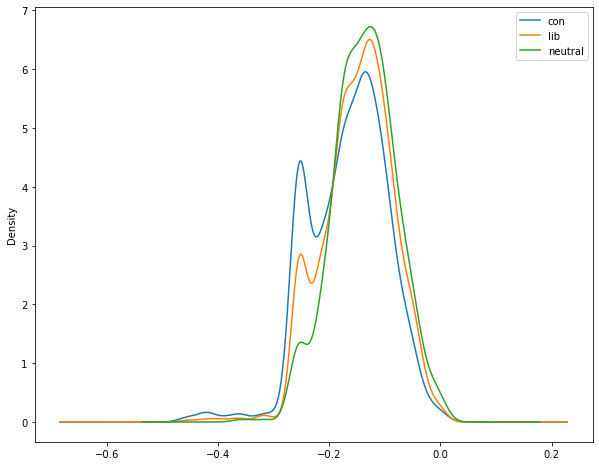

In [8]:
df2.groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True)

**Appendix: Code**

In [2]:
def combiner(prefix, number):
    '''
    This function converts a set of tsvs into labels and items.
    '''
    starter = ''
    labels = []
    items = []
    started = False
    for i in np.arange(100,number,100):
        title = prefix + str(i) + '.tsv' #create filename
        with open(title, 'r') as f:
            while True:
                line = f.readline()
                if not line:
                    break
                if not started:
                    started = True
                    starter = line.split('[')[1].strip() + ' ' #account for first line special case
                    continue
                if (line[0] == 'N'): #if in the middle of a line
                    starter += line.strip() + ' ' #append to your current WIP
                else:
                    labels.append(prefix) #otherwise append everything
                    items.append(starter.replace('Name: dem, dtype: float64,', 'dem').replace('Name: rep, dtype: float64)', 'rep').replace('71    ','').replace('71   ','').replace('(',''))
                    starter = line.split('[')[1].strip() + ' ' #and restart
    return labels, items

def func(nums, function = 'mean'):
    '''
    This function returns the aggregate function on the items
    '''
    fixed = []
    for i in nums: #extract numbers
        if len(i) > 5:
            d,r = i.split(' dem ')[0], i.split(' dem ')[1].split(' rep')[0]
            fixed.append(float(d) - float(r))
        else:
            fixed.append(0)
    if function == 'mean': #perform aggregate function
        return np.mean(fixed)
    elif function == 'max':
        return np.max(fixed)
    else:
        return np.min(fixed)